In [7]:
class LogisticRegression (object):
    '''
    Logistic Regression model.
    y = sigmoid(X,w)
    '''
    def __init__(self):
        self.t0 = 200
        self.t1 = 10000

    def set_weight_vector(self, w):
        self.w = w

    def linear_combination(self, X:np.ndarray) -> np.ndarray:
        '''
        Calculates linear combination of features.

        The linear  combination is calculated  with the following in vectorized form:
        z = Xw

        Args:
        X: feature matrix with shape (n, m)

        Returns:
            Linear combination of features with shape (n, )
        '''
        return X @ self.w

    def sigmoid(self, z: np.ndarray) -> np.ndarray:
        '''
        Returns probability of input belonging tp class 1

        Args:
            z: list of floats (n, ) np.ndarray
        Returns:
            Sigmoid activation vector (n, ) np.ndarray
        '''
        return 1 / (1 + np.exp(-z))

    def activation(self, X: np.ndarray) -> np.ndarray:
        '''
        Calulates the sigmoid activation for logistic regression.

        The sigmoid activation is calculated with the following vectorized form:
            act = sigmoid(Xw)

        Args:
            X: feature matrix with shape  (n, m)
        Returns:
            activation vector with shape (n, )
        '''
        return self.sigmoid(self.linear_combination(X))

    def predict(self, X: np.ndarray, threshold: float = 0.5) -> np.ndarray:
        '''
        Predicts the class label for samples.

        The samples are represented with a bunch of features and are presented in the form
        of feature matrix X. The class label is predicted  as follows:

        * if sigmoid(Xw) > threshold, the sample is labeled with class 1.
        * else class 0.

        Args:
            X: feature matrix of shape (n, m)
            threshold: probability threshold for classification
        Returns:
            A list of class labels of shape (n, )
        '''
        return np.where(self.activation(X) > threshold, 1, 0).astype(int)

    def loss(self, X: np.ndarray, y: np.ndarray, reg_rate: float = 0) -> float:
        '''
        Calculates the binary cross entropy loss on training set

        Args:
            X: Feature matrix for training data.
            y: Label vector for training data.
            reg_rate: regularization rate
        Returns:
            loss.
        '''
        predicted_prob = self.activation(X)

        return (-1 * (np.sum(y * np.log(predicted_prob) + (1 - y) *
                             np.log(1 - predicted_prob))) + reg_rate * np.dot(np.transpose(self.w), self.w))

    def calculate_gradient(self, X: np.ndarray, y:np.ndarray, reg_rate:float = 0) -> np.ndarray:
        '''
        Calculates the gradients of loss function w.r.t weight vector on training set.

        The gradient is calculated with the following vectorized operation:
            np.transpose(X)(sigmoid(Xw) - y) + \lambda w
        Args:
            X: Feature matrix for training data.
            y: Label vector for training data
            reg_rate: regularization rate
        Returns:
            A vector of gradients.
        '''
        return np.transpose(X) @ (self.activation(X) - y) + reg_rate * self.w

    def update_weights(self, grad: np.ndarray, lr: float) -> np.ndarray:
        '''
        Updates the weights based on gradient of loss function.

        Weight updates are carried out with the following formula:
            w_new = w_old - lr * grad

        Args:
            grad: gradient of loss w.r.t w
            lr: learning rate
        Return:
            Updated weight vector.
        '''
        return (self.w - lr * grad)

    def gd(self, X: np.ndarray, y: np.ndarray, num_epochs: int, lr: float, reg_rate: float = 0) -> np.ndarray:
        '''
        Estimates parameters of logistic regression through gradient descent

        Args:
            X: Feature matrix of training data.
            y: Label vector of training data.
            num_epochs: Number of training steps
            lr: learning rate
            reg_rate: regularization rate

        Returns:
            Weight vector: Final weight vector
        '''
        self.w = np.zeros(X.shape[1])
        self.w_all = []
        self.err_all = []
        for i in np.arange(0, num_epochs):
            dJdw = self.calculate_gradient(X, y, reg_rate)
            self.w_all.append(self.w)
            self.err_all.append(self.loss(X, y, reg_rate))
            self.w = self.update_weights(dJdw, lr)
        return self.w

    def learning_schedule(self, t):
        return self.t0 / (t + self.t1)

    def mbgd (self, X:np.ndarray, y:np.ndarray, num_epochs:int, batch_size:int, reg_rate:float = 0) -> np.ndarray:
        '''
        Estimates the parameters of logistic regression model through gradient descent

        Args:
            X: Feature matrix for training data
            y: Label vector for training data
            num_epochs: Number of training steps
            batch_size: Number of examples in a batch
            re_rate: regularization rate

        Returns:
            Weight vector: Final weight vector
        '''
        self.w = np.zeros((X.shape[1]))
        self.w_all = []
        self.err_all = []
        mini_batch_id = 0

        for epoch in range(num_epochs):
            shuffled_indices = np.random.permutation(X.shape[0])
            X_shuffled = X[shuffled_indices]
            y_shuffled = y[shuffled_indices]

            for i in range(0, X.shape[0], batch_size):
                mini_batch_id += 1
                xi = X_shuffled[i: i+batch_size]
                yi = y_shuffled[i: i+batch_size]
                self.w_all.append(self.w)
                self.err_all.append(self.loss(xi, yi,reg_rate))

                dJdw = 2/batch_size * self.calculate_gradient(xi, yi,reg_rate)
                self.w = self.update_weights(dJdw, self.learning_schedule(mini_batch_id))

        return self.w

    def sgd (self, X: np.ndarray, y:np.ndarray, num_epochs:int, reg_rate:float = 0) -> np.ndarray:
        '''
        Estimates the parameters of logistic regression model through gradient descent

        Args:
            X: Feature matrix for training data
            y: Label vector for training data
            num_epochs: Number of training steps
            reg_rate: Regularization rate

        Returns:
            Weight vector: Final weight vector
        '''
        self.w = np.zeros((X.shape[1]))
        self.w_all = []
        self.err_all = []

        for epoch in range(num_epochs):
            for i in range(X.shape[0]):
                random_index = np.random.randint(X.shape[0])
                xi = X[random_index:random_index+1]
                yi = y[random_index:random_index+1]

                self.w_all.append(self.w)
                self.err_all.append(self.loss(xi,yi,reg_rate))

                gradients = 2 * self.calculate_gradient(xi, yi,reg_rate)
                lr = self.learning_schedule(epoch * X.shape[0] +i)
                self.w = self.update_weights(gradients, lr)

        return self.w

# demonstartion of logistic regression

In [2]:
import numpy as np

In [3]:
# step 1- create a dataset
#@title [Toy Data creation]
def create_toy_data():
    x0 = np.random.normal(size = 50).reshape(-1, 2) - 1
    x1 = np.random.normal(size = 50).reshape(-1, 2) + 1
    return np.concatenate([x0, x1]), np.concatenate([np.zeros(25), np.ones(25)]).astype(int)
feature_matrix, label_vector = create_toy_data()

In [4]:
# step 2- add a dummy feature with polynomial transformation
import itertools
import functools

def get_combinations (x, degree):
    return itertools.combinations_with_replacement(x, degree)

def compute_new_features(items):
    # reduce (lambda x, y: x*y,[1,2,3,4,5]) calculates ((((1*2)*3)*4)*5)
    return functools.reduce(lambda x, y: x*y, items)

def polynomial_transform(x, degree, logging=False):
    # Converts to feature matrix
    if x.ndim == 1:
        x = x[:, None]
    x_t = x.transpose()
    features = [np.ones(len(x))] # Populates 1s as first feature for each example

    if logging:
        print("Input:", x)
    for degree in range(1,degree+1):
        for items in get_combinations(x_t, degree):
            features.append(compute_new_features(items))
            if logging:
                print(items, ":", compute_new_features(items))
    if logging:
        print(np.asarray(features).transpose())
    return np.asarray(features).transpose()
feature_matrix_bias = polynomial_transform(feature_matrix, degree=1)
feature_matrix_bias.shape

(50, 3)

In [5]:
#step 3 - train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(feature_matrix_bias,label_vector)

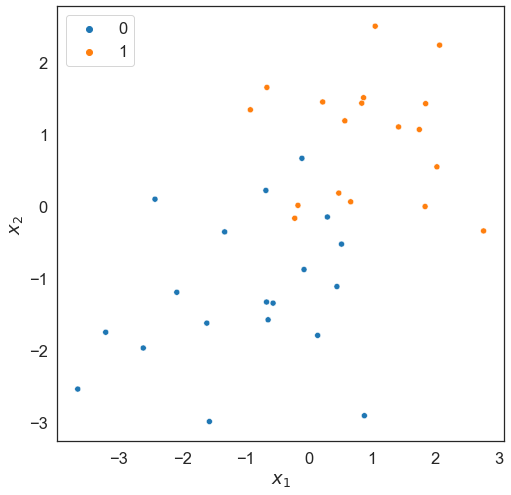

In [6]:
# visualize the dataset to get an idea of the distribution
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('white')
f = plt.figure(figsize=(8,8))
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':2.5})

sns.scatterplot(data=x_train, x=x_train[:,-2], y=x_train[:,-1],hue=y_train)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

the two classes are linearly separabe

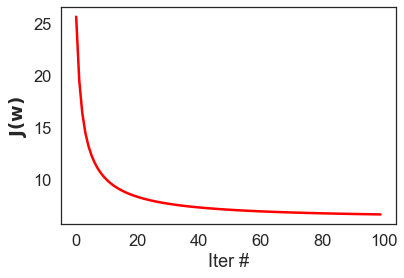

In [11]:
#step 5 : train logistic regression
log_reg = LogisticRegression()
log_reg.gd(x_train, y_train, num_epochs=100, reg_rate=0, lr=1e-2)

In [10]:
# step 6: lets see the learning curve and see if our model has learned well or not.
#for this we need to check if the loss has decreased or not in gradient descent
def plot_learning_curve(err_all):
    plt.plot(np.arange(len(err_all)), err_all, 'r-')
    plt.xlabel('Iter #')
    plt.ylabel('$\mathbf{J(w)}$')
plot_learning_curve(log_reg.err_all)